<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Artin%20Sinani%20-%20Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [22]:
import math
import numpy as np
import statistics

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def means(nums):
  total = 0 
  for i in nums:
    total += i
  return total / len(nums)

def vars(nums):
  mean = means(nums)
  var = 0
  for i in nums:
    var += (i - mean)**2
  return var / len(nums)

def std(nums):
  var = vars(nums)
  return math.sqrt(var)

mean = means(sales)
var = vars(sales)
st_dev = std(sales)

print("Mean: " + str(mean))
print("Variance: " + str(var))
print("Standard Deviation: " + str(st_dev))


Mean: 3052.714285714286
Variance: 183761.06122448976
Standard Deviation: 428.67360686714756


In [0]:
# Verify w/ library

In [24]:
print("Mean:" + str(np.mean(sales)))
print()
print("Variance: " + str(np.var(sales)))
print()
print("Standard Deviation: " + str(np.std(sales)))


Mean:3052.714285714286

Variance: 183761.06122448976

Standard Deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [25]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
cust = [127, 80, 105, 92, 120, 115, 93] 

np.cov(sales, cust)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [26]:
# STD of store last week
std(sales)

428.67360686714756

In [27]:
# STD of customers
std(cust)

15.792015549069118

In [28]:
# Both sales / customers
std(sales)*std(cust)

6769.620265121536

In [29]:
# STD
std_dev = np.std(cust)*np.std(sales)
print(std_dev)

6769.620265121536


In [30]:
# Finding Degrees of Freedom Using Numpy
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
dDoF = np.std(cust, ddof=1)*np.std(sales, ddof=1)

print(dDoF)


7897.890309308459


In [0]:
stat_std = statistics.stdev(cust)*statistics.stdev(sales)

In [32]:
print(stat_std)

7897.89030930846


In [33]:
std_product = statistics.stdev(cust)*statistics.stdev(sales)

cov = np.cov(sales,cust)

print(cov/std_product)

[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


In [34]:
np.corrcoef(sales, cust)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [35]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)

df.shape

(1310, 16)

In [36]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [38]:
num = df.select_dtypes(include=[np.number])
num = num.drop(columns='body')
num.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [39]:
num = num.dropna()
np.cov(num)

array([[  5435.13388114,   3879.82548373,   3879.5868192 , ...,
         -5347.84106585,  -5352.1715346 ,  -5340.04433594],
       [  3879.82548373,   2823.0782304 ,   2820.25878241, ...,
         -3316.66403674,  -3320.61105906,  -3316.44992076],
       [  3879.5868192 ,   2820.25878241,   2817.87174107, ...,
         -3151.84256696,  -3155.59837054,  -3151.05546875],
       ...,
       [ -5347.84106585,  -3316.66403674,  -3151.84256696, ...,
        211901.83445312, 212054.44896205, 212161.8234933 ],
       [ -5352.1715346 ,  -3320.61105906,  -3155.59837054, ...,
        212054.44896205, 212207.20186384, 212314.76434152],
       [ -5340.04433594,  -3316.44992076,  -3151.05546875, ...,
        212161.8234933 , 212314.76434152, 212422.86356027]])

# Orthogonality

In [0]:
import matplotlib.pyplot as plt

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

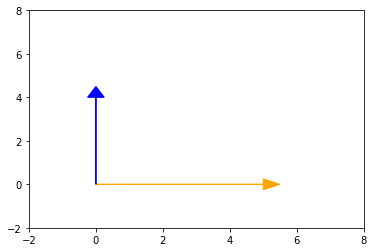

In [46]:
# Synonym for orthogonal = perpendicular

v_1 = [5,0]
v_2 = [0,4]

plt.arrow(0,0,v_1[0],v_1[1], head_width=.5, head_length=0.5, color ='orange')
plt.arrow(0,0,v_2[0],v_2[1], head_width=.5, head_length=0.5, color ='blue')

plt.xlim(-2, 8)
plt.ylim(-2,8)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [47]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

In [0]:
# They aren't orthogonal/perpendicular because their product isn't equal to zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
"""
Looks like all the values ended up being the same. With a little bit of mathematic 
wizardy, the equation for the dot product is the same as the tranposed vector
"""

In [48]:
from numpy import linalg

c = [2, -15, 6, 20]

#Find norm C squared
linalg.norm(c)**2

665.0

In [49]:
# C*C or dot product of c * C
np.dot(c,c)

665

In [50]:
# What is c * c tranpose

np.matmul(c, np.transpose(c))

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
c = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
c = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

In [0]:
# That took a long time.

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
func = [4,12,11,9,2]

In [52]:
func_hat = func / linalg.norm(func)
func_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

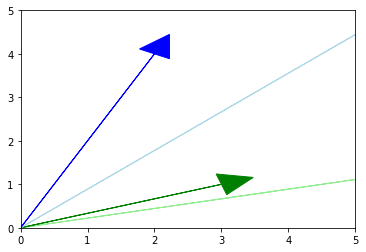

In [57]:
# One of Two: Linearly Dependent
a = [9,2]
b = [3,1]

#Two of Two: Linearly Independent

c = [9,8]
d = [2,4]

# 1 of 2: LD 
plt.arrow(0,0,a[0],a[1], head_width=.5, head_length=0.5, color ='lightgreen')
plt.arrow(0,0,b[0],b[1], head_width=.5, head_length=0.5, color ='green')

# 2 of 2: LI
plt.arrow(0,0,c[0],c[1], head_width=.5, head_length=0.5, color ='lightblue')
plt.arrow(0,0,d[0],d[1], head_width=.5, head_length=0.5, color ='blue')

plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

(0, 10)

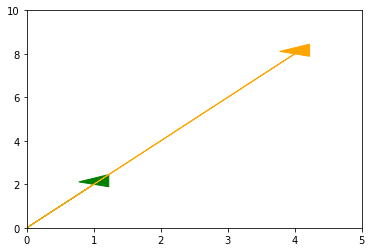

In [62]:
g = [1,2]
h = [4,8]

plt.arrow(0,0,g[0],g[1], head_width=.5, head_length=0.5, color ='green')
plt.arrow(0,0,h[0],h[1], head_width=.5, head_length=0.5, color ='orange')


plt.xlim(0,5)
plt.ylim(0,10)

# Span of vectors are linear, they exist on the same line.
# Hence, linearly dependent.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

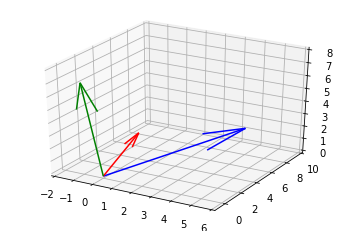

In [65]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.quiver(0,0,0,l[0],l[1],l[2], color ='red')
plt.quiver(0,0,0,m[0],m[1],m[2], color ='green')
plt.quiver(0,0,0,n[0],n[1],n[2], color ='blue')
ax.set_xlim(-2,6)
ax.set_ylim(-1,10)
ax.set_zlim(0,8)

plt.show()

# Linearly Independent vectors

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



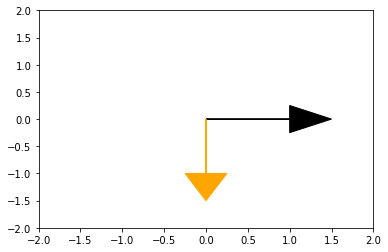

In [69]:
a = [1,0]
b = [0,-1]

plt.arrow(0,0,a[0],a[1], head_width=.5, head_length=0.5, color ='black')
plt.arrow(0,0,b[0],b[1], head_width=.5, head_length=0.5, color ='orange')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()

## 6.2 What does it mean to form a basis?

A basis of a vector space means it's a set of vectors that are LI and that span the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [70]:
r_P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

linalg.matrix_rank(r_P)

3

## 7.2 What does the rank of a matrix tell us?

Tells us the SPAN. 
matrix P has a rank of 3, thus it can span big R^3

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [72]:
v = [1, 3]
w = [-1, 2]

num = np.dot(w, v) 
deno = np.dot(v, v)
pro_w = np.multiply((num / deno),v)
pro_w

array([0.5, 1.5])

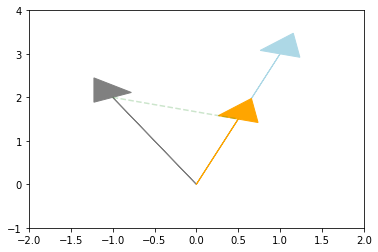

In [76]:
v = [1,3]
w = [-1, 2]
proj = [0.5,1.5]

plt.arrow(0,0,v[0],v[1], head_width=.5, head_length=0.5, color ='lightblue')
plt.arrow(0,0,w[0],w[1], head_width=.5, head_length=0.5, color ='grey')
plt.arrow(0,0,pro_w[0],pro_w[1], head_width=.5, head_length=0.5, color ='orange')
plt.plot([w[0],pro_w[0]],[w[1],pro_w[1]], alpha=0.2, color='green', linestyle='--')

plt.xlim(-2,2)
plt.ylim(-1,4)

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

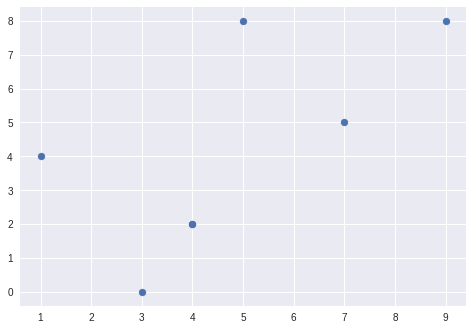

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()